# Нахождение оптимальной регрессионной модели

$\textbf{Постановка задачи:}$
написать программу, подбирающую оптимаьлную регрессионную модель

$\textbf{Используемые инструменты:}$
библиотеки numpy, matplotlib, sklearn

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

$\textbf{Используемая метрика:}$
R^2
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - y_{i-pred})^2}{\sum_{i=1}^{n} (y_i - y_{mean})^2}$$

$\textbf{Программа:}$ данная функция несёт в себе весь основной функционал программы, в том числе генерацию датасета и разбиение его на тестовую и обучающую выборки, рисование графиков и подбор параметров регрессии. Дополнительная информация о программе приведена в комментариях в коде.

In [20]:
def get_model(f=lambda x: x**2, l_corner=-3, r_corner=3, accuracy=60, dataset=None):
    # Сгенерируем датасет
    if dataset is not None:
        x = np.array([dataset]).T[0]
        y = np.array([dataset]).T[1]
    else:
        x = np.linspace(l_corner, r_corner, accuracy*(r_corner - l_corner))
        y = f(x)

    # Здесь мы будем хранить результаты апроксимации.
    # Лучшее рещение выбирается исходя из метрики r2_score
    result = []

    # Разобъём датасет на обучающую и тестовую выборки
    x = [[x[i], i] for i in range(len(x))]
    y = [[y[i], i] for i in range(len(y))]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    x_train.sort(key=lambda i: i[1])
    y_train.sort(key=lambda i: i[1])
    x_test.sort(key=lambda i: i[1])
    y_test.sort(key=lambda i: i[1])
    x_train = np.array([x_train[i][0] for i in range(len(x_train))])
    y_train = np.array([y_train[i][0] for i in range(len(y_train))])
    x_test = np.array([x_test[i][0] for i in range(len(x_test))])
    y_test = np.array([y_test[i][0] for i in range(len(y_test))])

    # Небольшое зашумление тернировочных данных для повышения эффективности аппроксимации
    y_train *= (np.random.ranf(len(y_train)) - 0.5 + 1000)/1000

    # Создадим график
    fig, ax = plt.subplots()

    # Добавим на него обучающие точки
    ax.scatter(x_train, y_train, label="Тренировачные точки")

    # Пройдём в цикле по полиномам степеней 1-5
    for degree in range(1, 6):
        # Подберём коэффициенты полинома под обучающую выборку 
        model = np.polyfit(x_train, y_train, degree)[::-1]
        # Построим функцию предсказатель
        polapprox = lambda x: sum([model[i]*x**i for i in range(0, degree + 1)])
        # Зададим предсказанный график полинома с помощью предсказателя
        ax.plot(x_test, polapprox(x_test), label=f"Полином степени {degree}")
        # Внесём данные в результат
        result.append([r2_score(polapprox(x_test), y_test),
                        f"Полином степени {degree}",
                        model[::-1]])

    # Подберём коэффициенты показательного урравнения регрессии под обучающую выборку
    if min(y_train) > 0:
        b, a = map(float, np.polyfit(x_train, np.log(y_train), 1))
        # Построим функцию предсказатель
        expapprox = lambda x: np.exp(a) * np.exp(b*x)
        # Зададим предсказанный график уравения полиномиальной регрессии с помощью предсказателя
        plt.plot(x_test, expapprox(x_test), label="Показательное уравнение регрессии")
        # Внесём даные в результат
        if np.isfinite(a) and np.isfinite(b):
            result.append([r2_score(expapprox(x_test), y_test),
                            "Показательное уравнение регрессии",
                            [a, b]])
        else:
            result.append([np.NaN,
                            "Показательное уравнение регрессии",
                            [a, b]])
    else:
        result.append([np.NaN,
                        "Показательное уравнение регрессии",
                        [np.NaN, np.NaN]])

    # Добавим легенду на график
    ax.legend()
    # Выведем  результаты
    print("Лучший результат:\n", max(result, key= lambda x: x[0]))
    print("Полные результаты:")
    for arr in result:
        print(arr)
    plt.show()

$\textbf{Рассмотрим несколько примеров работы программы:}$

Аппрокцимация графика $\sin x$ на промежутке $(-3, 3)$

Лучший результат:
 [0.9999999274447603, 'Полином степени 2', array([ 1.00012607e+00, -4.12275228e-04, -4.58039202e-05])]
Полные результаты:
[-620.4036872640827, 'Полином степени 1', array([-0.06698754,  3.10140527])]
[0.9999999274447603, 'Полином степени 2', array([ 1.00012607e+00, -4.12275228e-04, -4.58039202e-05])]
[0.9999998293016497, 'Полином степени 3', array([-2.32448340e-04,  1.00012035e+00,  8.55625936e-04, -5.03566205e-05])]
[0.9999998050282982, 'Полином степени 4', array([-4.99442283e-05, -2.34362790e-04,  1.00050985e+00,  8.66178206e-04,
       -4.13500111e-04])]
[0.9999997892229875, 'Полином степени 5', array([-2.56073077e-05, -5.12461302e-05,  2.35582683e-05,  1.00051920e+00,
        3.62453445e-04, -4.14688788e-04])]
[-2173.342585678976, 'Показательное уравнение регрессии', [0.25138037243824685, -0.03100522881402398]]


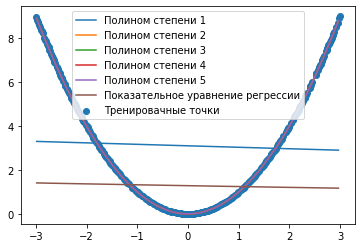

In [5]:
get_model()

Аппрокцимация графика $\ln x$ на промежутке $(1, 10)$

/tmp/ipykernel_40298/2673495706.py:49: RuntimeWarning: divide by zero encountered in log
  b, a = map(float, np.polyfit(x_train, np.log(y_train), 1))


Лучший результат:
 [0.9999471532494295, 'Полином степени 5', array([ 1.21264122e-04, -3.97222912e-03,  5.16851954e-02, -3.46970714e-01,
        1.39971239e+00, -1.07619544e+00])]
Полные результаты:
[0.9173534989886292, 'Полином степени 1', array([0.21857428, 0.35767017])]
[0.9886625591408623, 'Полином степени 2', array([-0.02487714,  0.49127984, -0.22093162])]
[0.9983914708733157, 'Полином степени 3', array([ 0.00373532, -0.0859455 ,  0.77891406, -0.58307501])]
[0.9996914370540481, 'Полином степени 4', array([-6.55096797e-04,  1.81109537e-02, -1.92940434e-01,  1.08766325e+00,
       -8.59899917e-01])]
[0.9999471532494295, 'Полином степени 5', array([ 1.21264122e-04, -3.97222912e-03,  5.16851954e-02, -3.46970714e-01,
        1.39971239e+00, -1.07619544e+00])]
[nan, 'Показательное уравнение регрессии', [nan, nan]]


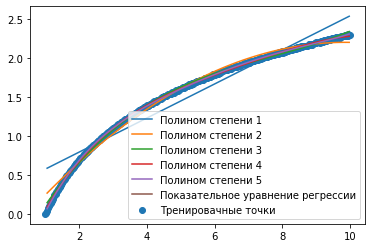

In [14]:
get_model(np.log, l_corner=1, r_corner=10)

Аппрокцимация графика $x^4 - 0.33x^3 + 0.17x^2 - 3$ на промежутке $(-3, 3)$

Лучший результат:
 [0.9999999939230417, 'Полином степени 4', array([ 1.00015134e+00, -3.30248329e-01,  1.69179115e-01,  9.80955650e-04,
       -2.99964864e+00])]
Полные результаты:
[-47.324400969858246, 'Полином степени 1', array([-1.84745799, 14.73546736])]
[0.911463430257674, 'Полином степени 2', array([  8.01210398,  -1.81029786, -10.3181623 ])]
[0.9145108086091207, 'Полином степени 3', array([ -0.34130538,   8.01604409,   0.06626881, -10.34200782])]
[0.9999999939230417, 'Полином степени 4', array([ 1.00015134e+00, -3.30248329e-01,  1.69179115e-01,  9.80955650e-04,
       -2.99964864e+00])]
[0.9999999918126349, 'Полином степени 5', array([-1.21208539e-04,  1.00015081e+00, -3.29021402e-01,  1.69177505e-01,
       -1.42617892e-03, -2.99962343e+00])]
[nan, 'Показательное уравнение регрессии', [nan, nan]]


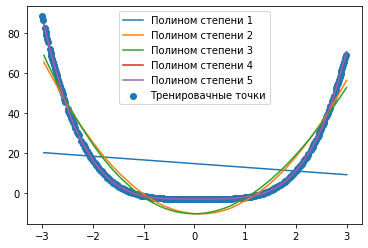

In [21]:
get_model(lambda x: x**4 - 0.33*x**3+0.17*x**2-3)

Лучший результат:
 [0.999999998473266, 'Показательное уравнение регрессии', [1.3862723808579325, 0.9999989912795351]]
Полные результаты:
[0.7210337381730019, 'Полином степени 1', array([ 114.06478174, -196.23301736])]
[0.9860832959077211, 'Полином степени 2', array([  52.80040384, -198.69927439,  195.75152326])]
[0.9991463945413813, 'Полином степени 3', array([  16.65812935,  -96.57305963,  207.22179912, -127.54349934])]
[0.9999649876151258, 'Полином степени 4', array([   4.00470867,  -31.34643895,  105.16542328, -139.75737773,
         75.27709294])]
[0.9999991173488441, 'Полином степени 5', array([  0.7779904 ,  -7.65932946,  35.08605   , -72.96901394,
        83.04381461, -27.8586636 ])]
[0.999999998473266, 'Показательное уравнение регрессии', [1.3862723808579325, 0.9999989912795351]]


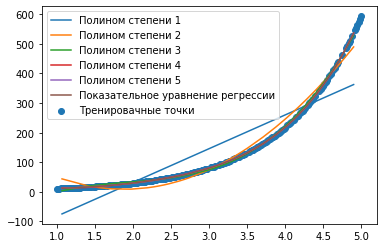

In [23]:
get_model(lambda x: 4*np.exp(x), l_corner=1, r_corner=5)

$\textbf{Вывод:}$ программа успешно справляется с аппроксимацией опробованных функций на данных ограниченных промежутках. Полученные модели довольно близки к исходным. Стоит заметить, что программа может апроксимировать не только функции, но и наборы точек на плоскости. В данных примерах функции используются как один из простейших методов для построения набора точек на плоскости